# Attribute information

Invoice id: Computer generated sales slip invoice identification number.

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters.

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer.

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

Unit price: Price of each product in $.

Quantity: Number of products purchased by customer.

Tax: 5% tax fee for customer buying.

Total: Total price including tax.

Date: Date of purchase (Record available from January 2019 to March 2019).

Time: Purchase time (10am to 9pm).

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).

COGS: Cost of goods sold.

Gross margin percentage: Gross margin percentage.

Gross income: Gross income.

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/sales-of-a-supermarket/supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe().style.background_gradient(cmap='gnuplot')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [5]:
data.isna().sum()/len(data)*100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [6]:
duplicates=data.duplicated().sum()
print(f'The data contains {duplicates} duplicate values')

The data contains 0 duplicate values


# Explore data analysis (EDA)
### Question asked from the to understnd the hiding question

* Bar plot to show which branch has the highest sales records.
* Pie chart to visualize the gender distribution in the data.
* Line chart to analyze sales trends over time.
* Histogram to understand which city has the highest sales, differentiated by gender.
* Bar chart to determine which product line has the most sales.
* Subplots to analyze sales by product line and city, differentiated by gender.
* Calculate the average rating for each branch and product line.

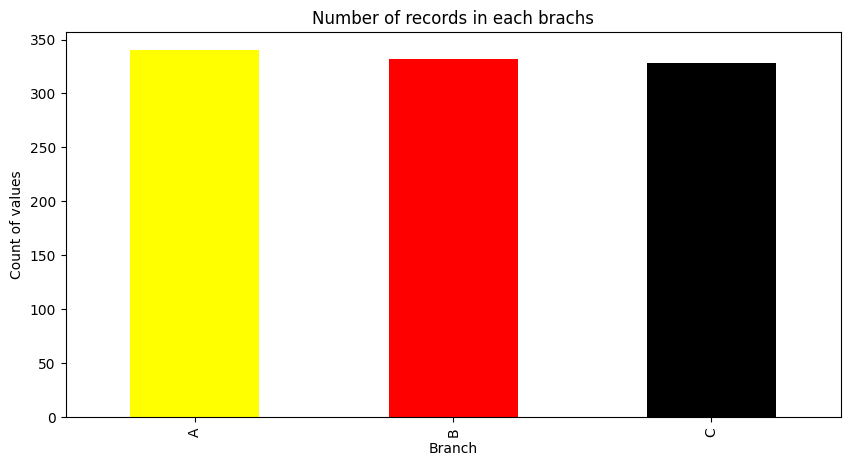

In [7]:
# How many record in each branch wise
data['Branch'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['yellow','red','black'])
plt.title('Number of records in each brachs')
plt.xlabel('Branch')
plt.ylabel('Count of values')
plt.show()

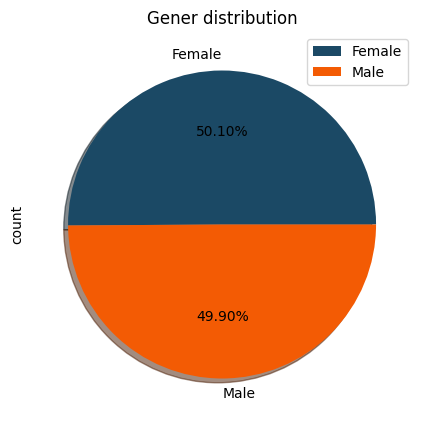

In [8]:
# Create a pie chart for gener percentage
data['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(10,5),
      explode=[0,0], 
      labels=['Female','Male'], colors=['#1b4965','#f35b04'], 
      autopct='%1.2f%%', 
      shadow=True)
plt.title('Gener distribution')
plt.legend()
plt.show()

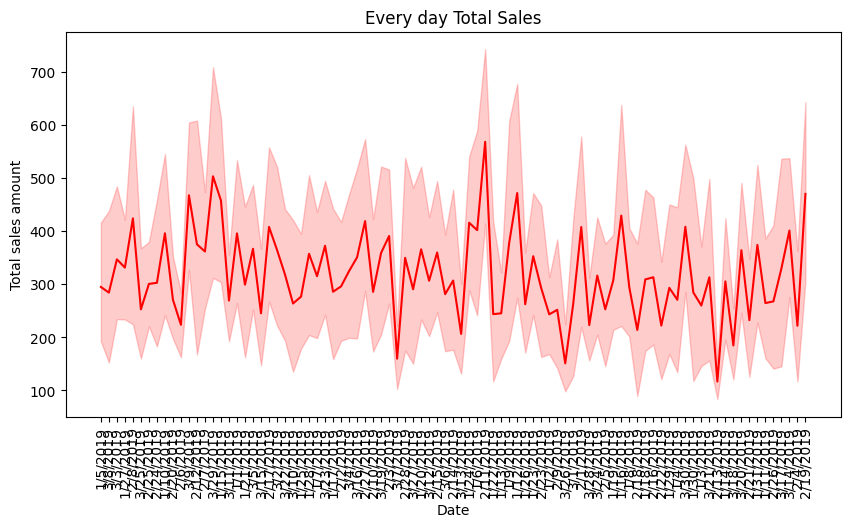

In [9]:
# Create a line chart to understand the sales trend
plt.figure(figsize=(10,5))
sns.lineplot(data,x='Date',y='Total',palette='coolwarm',color='red')
plt.title("Every day Total Sales")
plt.xlabel("Date")
plt.ylabel('Total sales amount')
plt.xticks(rotation=90)
plt.show()

### Total Sales

In [10]:
'''create histogram to understand the total sales 
done in each state with geneder wise using the ploty'''
fig=px.histogram(data,x='City',y='Total',color='Gender',title='Total sales done each city with gener wise')
fig.update_layout(plot_bgcolor='#90e0ef')
fig.show()

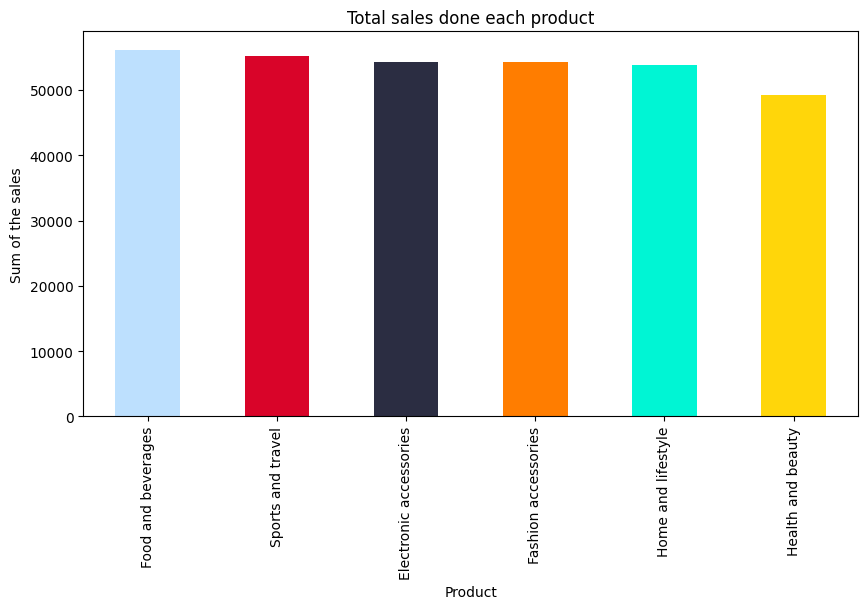

In [11]:
# create a barchart to understand the total sales done in each product wise 
colors=['#bde0fe','#d90429','#2b2d42','#ff7d00','#00f5d4','#ffd60a']
data.groupby('Product line')['Total'].sum().sort_values(ascending=False)\
.plot(kind='bar',title='Total sales done each product',color=colors,figsize=(10,5))
plt.xlabel('Product')
plt.ylabel('Sum of the sales')
plt.show()

## Gender behavior

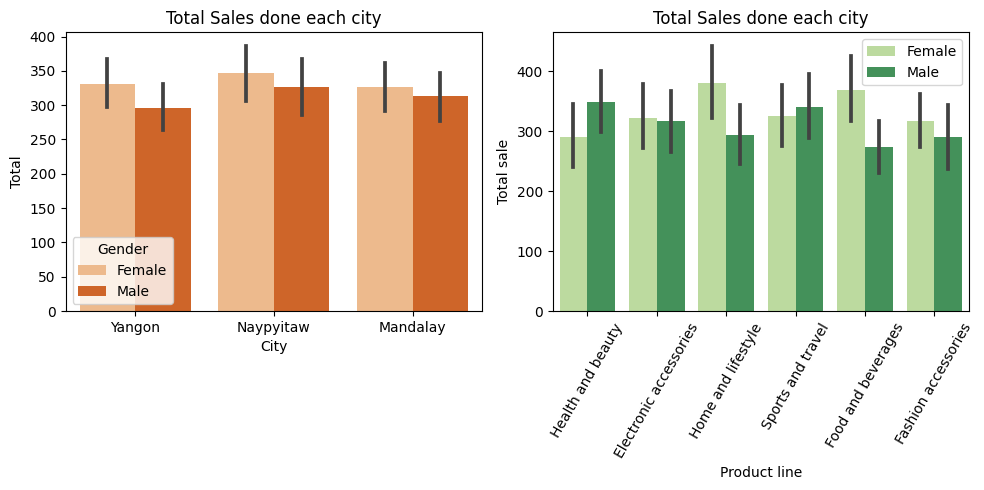

In [12]:
# Create subplots understand the total sales in city wise and different product with gender wise
# fist plot
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(ax=ax[0],data=data,x='City',y='Total',hue='Gender',palette='Oranges')
ax[0].set_title('Total Sales done each city')
plt.xlabel('City')
plt.ylabel('Sum of sales')
# second plots
sns.barplot(ax=ax[1],data=data,x='Product line',y='Total',hue='Gender',palette='YlGn')
ax[1].set_title('Total Sales done each city')
plt.xlabel('Product line')
plt.ylabel('Total sale')
plt.xticks(rotation=60)
plt.tight_layout()
plt.legend()
plt.show()

## Find the Rating

In [13]:
'''
Each branch average  rating we use groupby functioin and the rating 
convert into outof 5 in same we also do same process for the product line also

'''
branch_rating=pd.DataFrame(data.groupby('Branch')['Rating'].mean().sort_values(ascending=False)/2).style.background_gradient(cmap='afmhot')
branch_rating

,Rating
Branch,
C,3.536433
A,3.513529
B,3.409036


In [14]:
product_rating=pd.DataFrame(data.groupby('Product line')['Rating'].mean().sort_values(ascending=False)/2).style.background_gradient(cmap='summer')
product_rating

,Rating
Product line,
Food and beverages,3.556609
Fashion accessories,3.514607
Health and beauty,3.501645
Electronic accessories,3.462353
Sports and travel,3.458133
Home and lifestyle,3.418750


## Tax payer

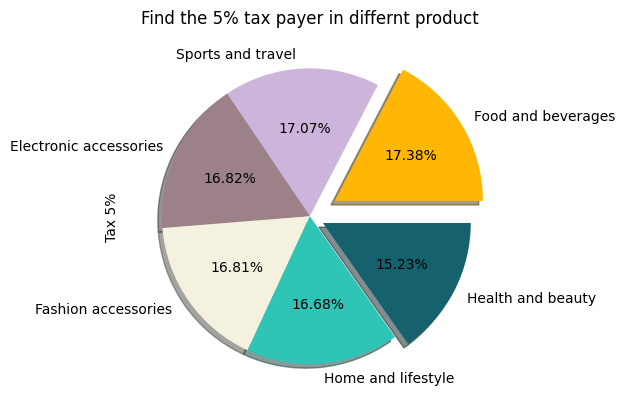

In [15]:
# Create pie chart which product line has highest tax payer in the data
label=['Food and beverages',
'Sports and travel ',        
'Electronic accessories',   
'Fashion accessories ',      
'Home and lifestyle',        
'Health and beauty']
color=['#ffb703','#cdb4db','#9d8189','#f4f1de','#2ec4b6','#15616d']
data.groupby('Product line')['Tax 5%'].sum().sort_values(ascending=False)\
.plot(kind='pie',explode=[0.2,0,0,0,0,0.1], 
      labels=label, colors=color, 
      autopct='%1.2f%%', 
      shadow=True)
plt.title('Find the 5% tax payer in differnt product')
plt.show()

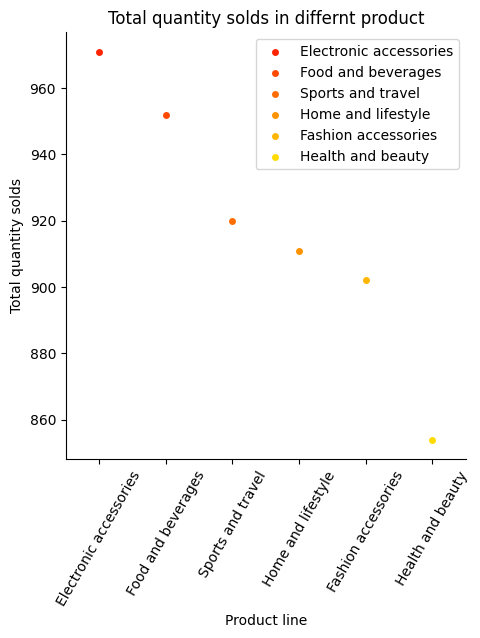

In [16]:
# Create a scatter plot to understand the product line and quantity
quantity=data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
sns.catplot(data=quantity,x=quantity.index,y=quantity.values,palette='autumn')
plt.title('Total quantity solds in differnt product')
plt.xlabel('Product line')
plt.ylabel('Total quantity solds')
plt.legend(labels=quantity.index)
plt.xticks(rotation=60)
plt.show()

In [17]:
'''
Understand the user behavior if the person purchaes any 
product they pay either cash,card,ewallert we do some data process
we find the which product payment mostly done using he grouby function
we create dataframe.
'''
payment_method=pd.DataFrame(data.groupby('Product line')['Payment'].value_counts())
payment_method.unstack().style.background_gradient(cmap='ocean_r')

# Customer behavior

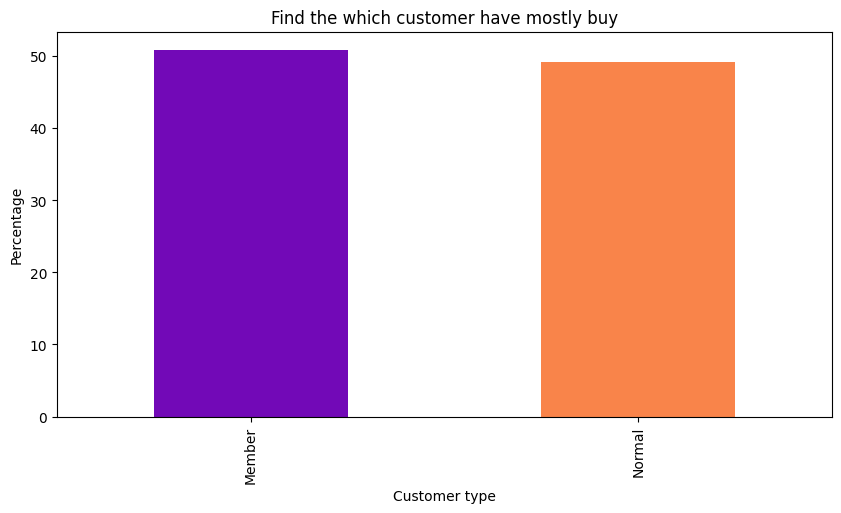

In [18]:
'''
To find the customer behavior beacause we groupby the customer with 
total sales values and find the which customer came to shop they purchase
or not we clearly identify if the person take membership they 
definately buy the porducts
'''

customer=data.groupby('Customer type')['Total'].sum()
overal_total=data['Total'].sum()
percentage=(customer/overal_total)*100
percentage.plot(kind='bar',figsize=(10,5),color=['#7209b7','#f9844a'])
plt.title('Find the which customer have mostly buy')
plt.xlabel('Customer type')
plt.ylabel('Percentage')
plt.show()

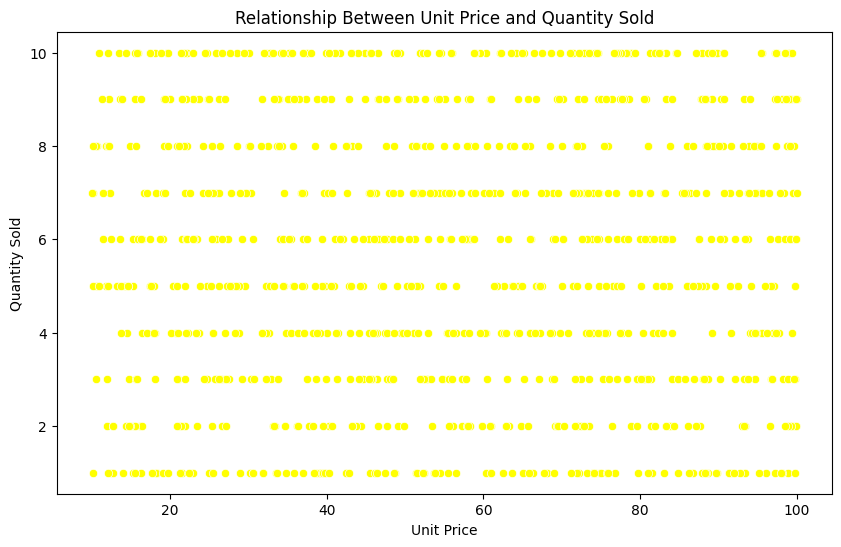

In [19]:
'''
Create a realtionship between unit price and quantity using 
scatter plot
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unit price', y='Quantity',color='yellow')
plt.title('Relationship Between Unit Price and Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

## Gross income

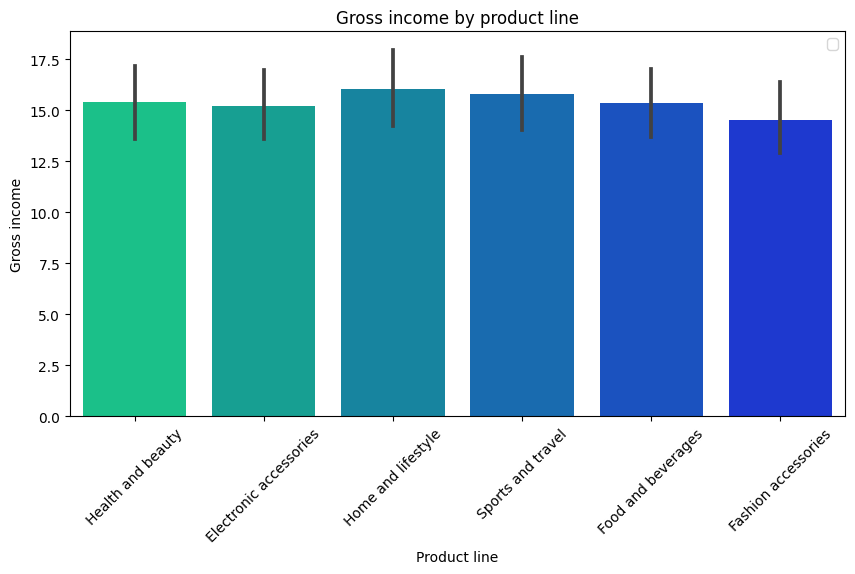

In [20]:
'''
Let's Visualize the total gross income in each product line
with bar plots
'''
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Product line',y='gross income',palette='winter_r')
plt.title('Gross income by product line')
plt.xlabel('Product line')
plt.ylabel('Gross income')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Monthly sales analysis

In [21]:
'''
We find which month mostly business done we extract the month
from the date column and then create new column for
month and visualize with barplots
'''
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
def month_convert(month):
    if month==1:
        return 'Jan'
    if month==2:
        return 'Feb'
    else:
        return 'Mar'
    return
data['Month']=data['Month'].apply(month_convert)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Feb


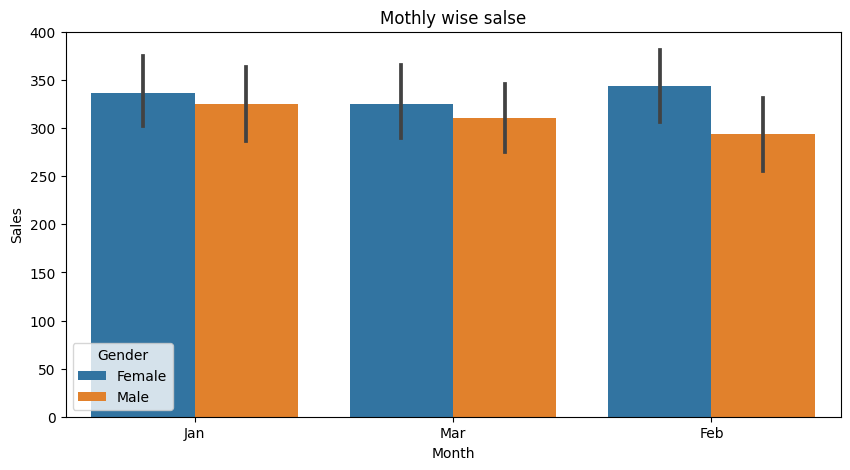

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Month',y='Total',hue='Gender')
plt.title('Mothly wise salse')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

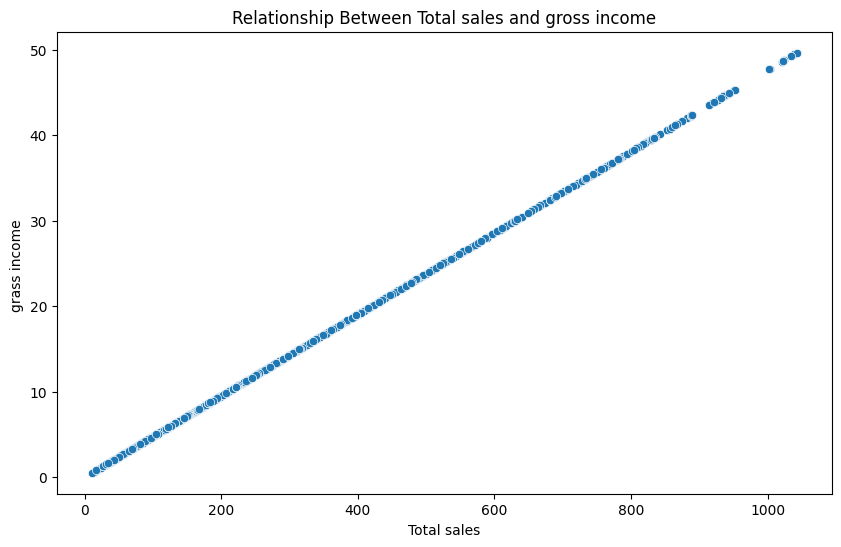

In [23]:
# Create a scatter plot for total sales vs gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total', y='gross income')
plt.title('Relationship Between Total sales and gross income')
plt.xlabel('Total sales')
plt.ylabel('grass income ')
plt.show()

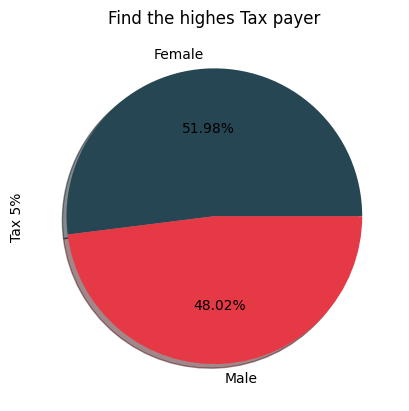

In [24]:
data.groupby('Gender')['Tax 5%'].sum().sort_values(ascending=False)\
.plot(kind='pie',explode=[0,0], 
      labels=['Female','Male'], colors=['#264653','#e63946'], 
      autopct='%1.2f%%', 
      shadow=True)
plt.title('Find the highes Tax payer')
plt.show()

## Summary:
* The first chart shows that Branch A has the highest records compared to Branches B and C.
* In the gender percentage, females dominate.
* The line chart clearly shows the business runs with ups and downs.
* The bar chart shows that male customers do most business, followed by Mandalay, Yangon, and lastly Naypyitaw.
* Similarly, female customers mostly do business in Naypyitaw, followed by Yangon and Mandalay, indicating some differences.
* Total sales are dominated by the food and beverage sector, followed by sports and travel. The least sales are in the health and beauty sector.
* Female customers mostly spend on home and lifestyle, followed by food and beverages.
* Male customers spend more on health and beauty, followed by sports and traveling.
* The average rating for Branches C and A are slightly similar compared to Branch B, which has been given a different customer rating.
* In product ratings, food and beverages, fashion accessories, and health and beauty are nearly equal, with slight differences compared to other sectors.
* Food and beverages, as well as sports and health, are the highest taxpayers.
* Membership customers have a higher purchase rate in the store compared to normal customers, though the difference is small.
* We have high gross income in home and lifestyle, and sports and health sectors.
* In February, female customers made the highest sales, while in January, male customers made the highest sales.

In [ ]:
Hello! I've come with another project on supermarket sales analysis. In this project, I will perform exploratory data analysis to understand the trends and sales in different products and incomes.

The project begins by obtaining the dataset from the Kaggle website. We will then check for data preprocessing steps like null values and duplicates.

In the next step, we enter the EDA (exploratory data analysis) part. Here, we will analyze product sales and monthly sales using bar charts, line charts, and pie charts to understand the trends. In the charts, we can clearly observe that females are dominating in terms of purchases, and the food and beverage sector has the highest tax and sales. We also note that membership customers have higher sales in the data.

We will ask some interesting questions from the data to gain deeper insights. If any modifications are needed, please let me know. Thank you for your support, and if you like my project, please hit the like button.